In [1]:
import time
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from collections import defaultdict
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30
from scipy.integrate import odeint

$\qquad \displaystyle \ddot{x}+\delta\dot{x}−x+x^3 = F \cos \omega t$                                                             


In [3]:
dt = 0.01
w = 1
F = 0.4
b = 0.25
T = 5000000

x = np.zeros(T)
v = np.zeros(T)
t = np.arange(0, T*dt, dt)
x[0] = 0.1
v[0] = 0.1

for n in range(T-1):
    a = F*np.cos(w*n*dt) - b*v[n] + x[n] - x[n]**3
    v[n+1] = v[n] + a*dt
    x[n+1] = x[n] + v[n]*dt

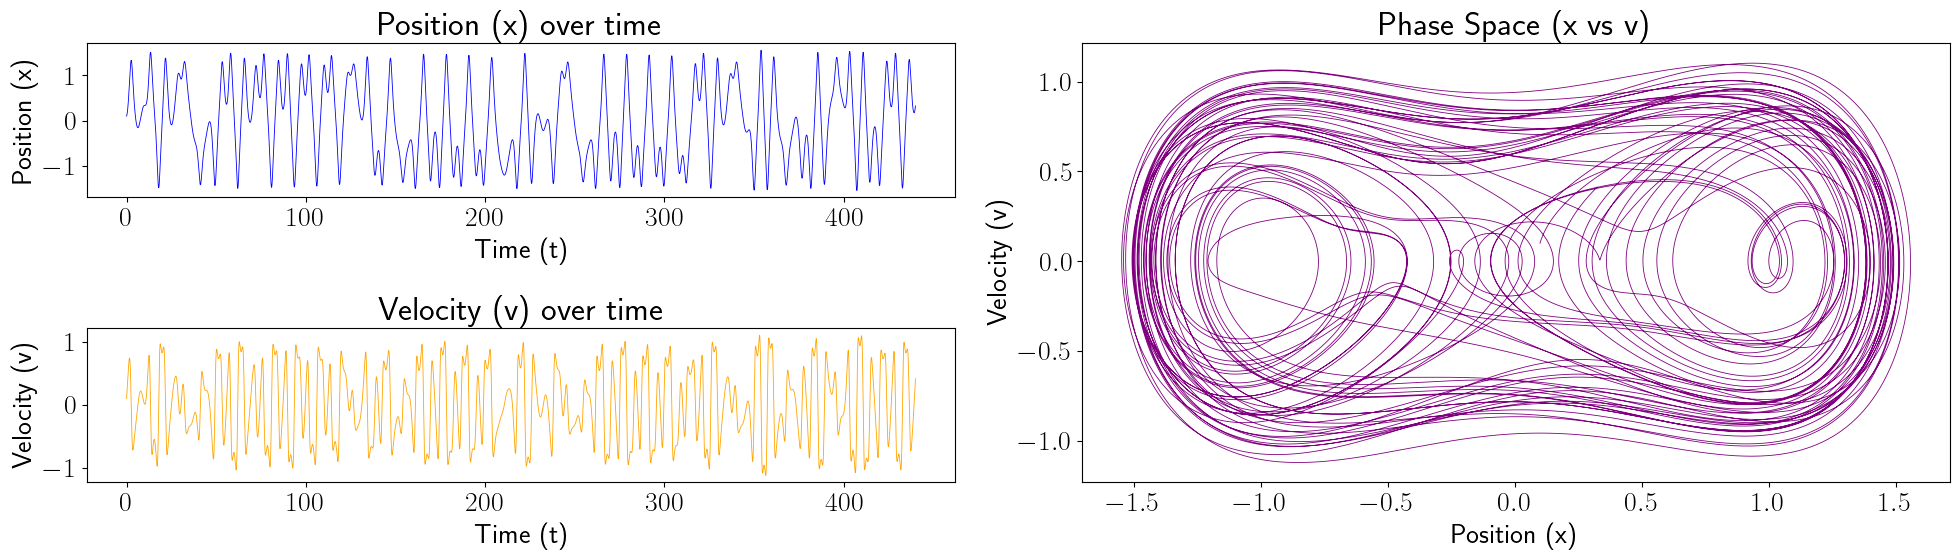

In [5]:
for n in range(45000):
    if n % 1000 == 0:
        clear_output(wait=True)
        fig = plt.figure(figsize=(20,6))

        gs=fig.add_gridspec(2,4)
        ax1=fig.add_subplot(gs[0,0:2])
        ax2=fig.add_subplot(gs[1,0:2])
        ax3=fig.add_subplot(gs[:,2:4])
        
        # Position plot
        ax1.clear()
        ax1.plot(t[:n], x[:n], lw=0.6, color='blue')
        ax1.set_title("Position (x) over time")
        ax1.set_xlabel("Time (t)")
        ax1.set_ylabel("Position (x)")
                
        # Velocity plot
        ax2.clear()
        ax2.plot(t[:n], v[:n], lw=0.6, color='orange')
        ax2.set_title("Velocity (v) over time")
        ax2.set_xlabel("Time (t)")
        ax2.set_ylabel("Velocity (v)")
        
        ax3.clear()
        ax3.plot(x[:n], v[:n], lw=0.6, color='purple')
        ax3.set_title("Phase Space (x vs v)")
        ax3.set_xlabel("Position (x)")
        ax3.set_ylabel("Velocity (v)")
        
        plt.tight_layout()
        plt.show()                                        

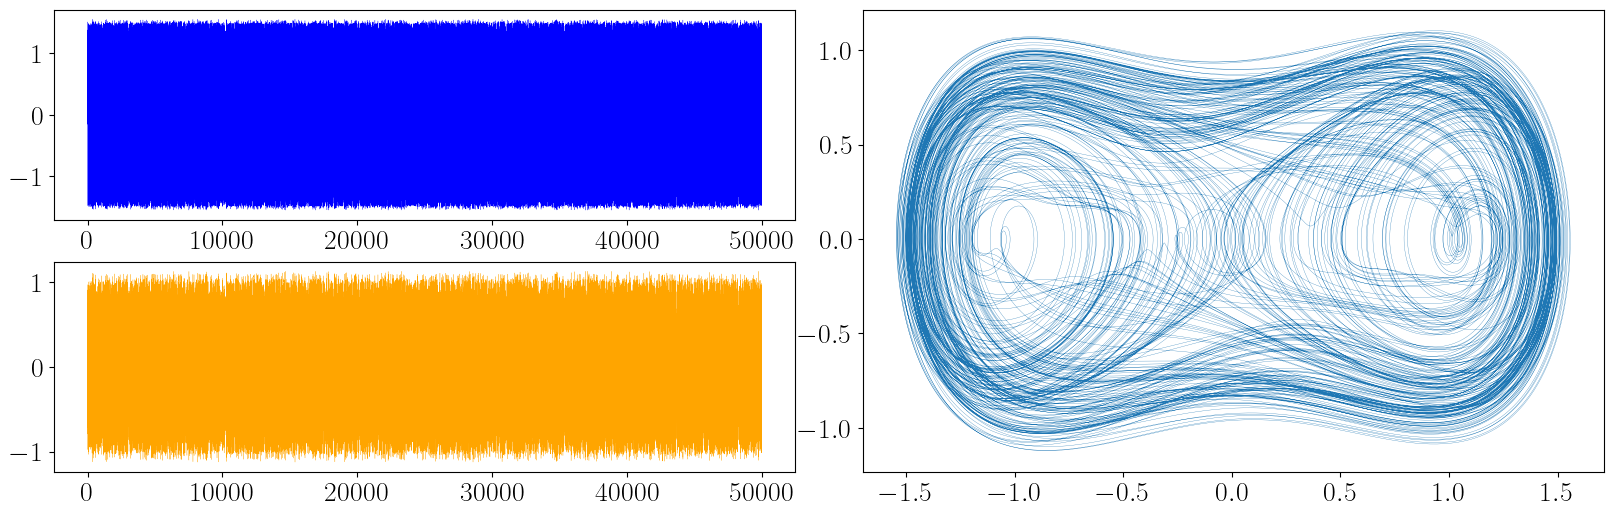

In [8]:
fig = plt.figure(figsize=(20,6))
gs=fig.add_gridspec(2,4)
ax1=fig.add_subplot(gs[0,0:2])
ax2=fig.add_subplot(gs[1,0:2])
ax3=fig.add_subplot(gs[:,2:4])

ax1.plot(t, x, lw=0.2, color='blue')
ax1.set_title("Position (x) over time")
ax1.set_xlabel("Time (t)")
ax1.set_ylabel("Position (x)")

ax2.plot(t, v, lw=0.2, color='orange')
ax2.set_title("Velocity (v) over time")
ax2.set_xlabel("Time (t)")
ax2.set_ylabel("Velocity (v)")
        
ax3.plot(x[10000:200000:], v[10000:200000:],lw=0.2)
ax3.set_title("Phase Space (x vs v)")
ax3.set_xlabel("Position (x)")
ax3.set_ylabel("Velocity (v)")

plt.show()         

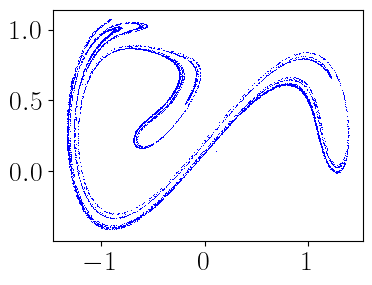

In [7]:
for n in range(1000):
    ts = abs((t + n/100 * 2*np.pi) % (2*np.pi)) < dt
    clear_output(wait=True)
    plt.figure(figsize=(4,3))
    plt.clf() 
    plt.plot(x[ts], v[ts], 'b,', lw=0.2)   
    plt.title("Poincare section (x vs v)")
    plt.xlabel("Position (x)")
    plt.ylabel("Velocity (v)")
    plt.show()                                         

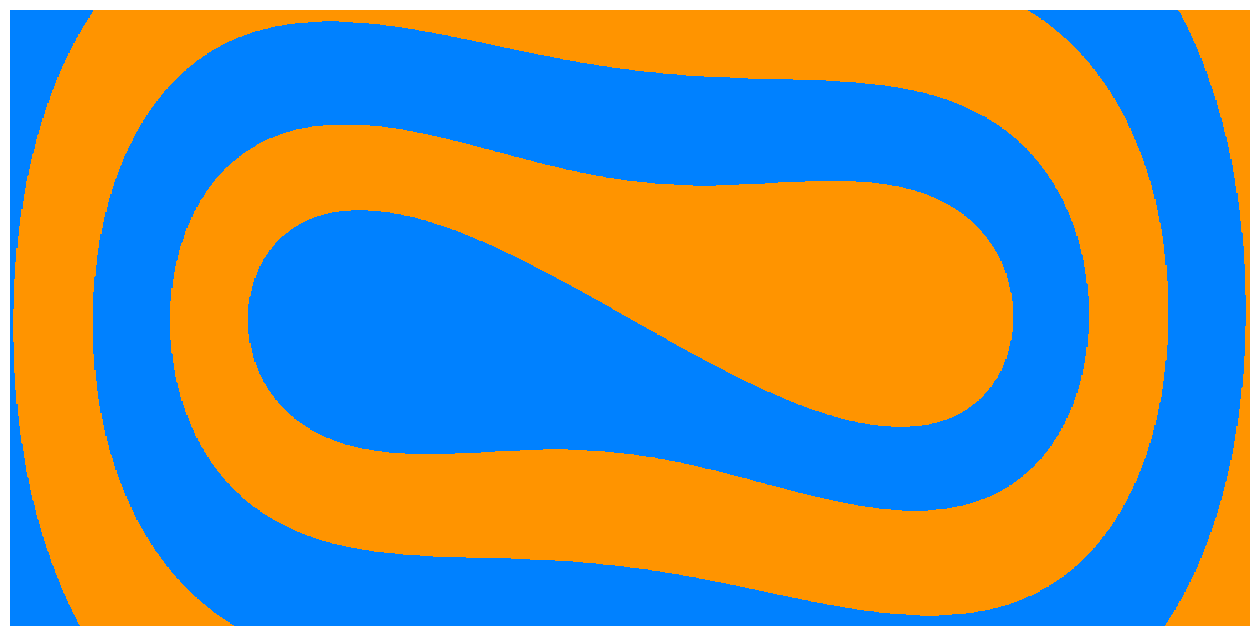

In [3]:
dt = 0.01
w  = 1
F  = 0.
b  = 0.25
T  = int( 5 * 2*np.pi/dt + 1)
xr = np.linspace(-2.5,2.5,1000)
yr = np.linspace(-2.5,2.5,1000)

x, v = np.meshgrid(xr, yr)

for n in range(T-1):
    a = F*np.cos(w*n*dt) - b*v + x - x**3
    v = v + a*dt
    x = x + v*dt
    if n%10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(16,8))
        plt.contourf(x>0, level=[-2.5,0,2.5], cmap='jet')
        plt.axis(False)
        plt.show()

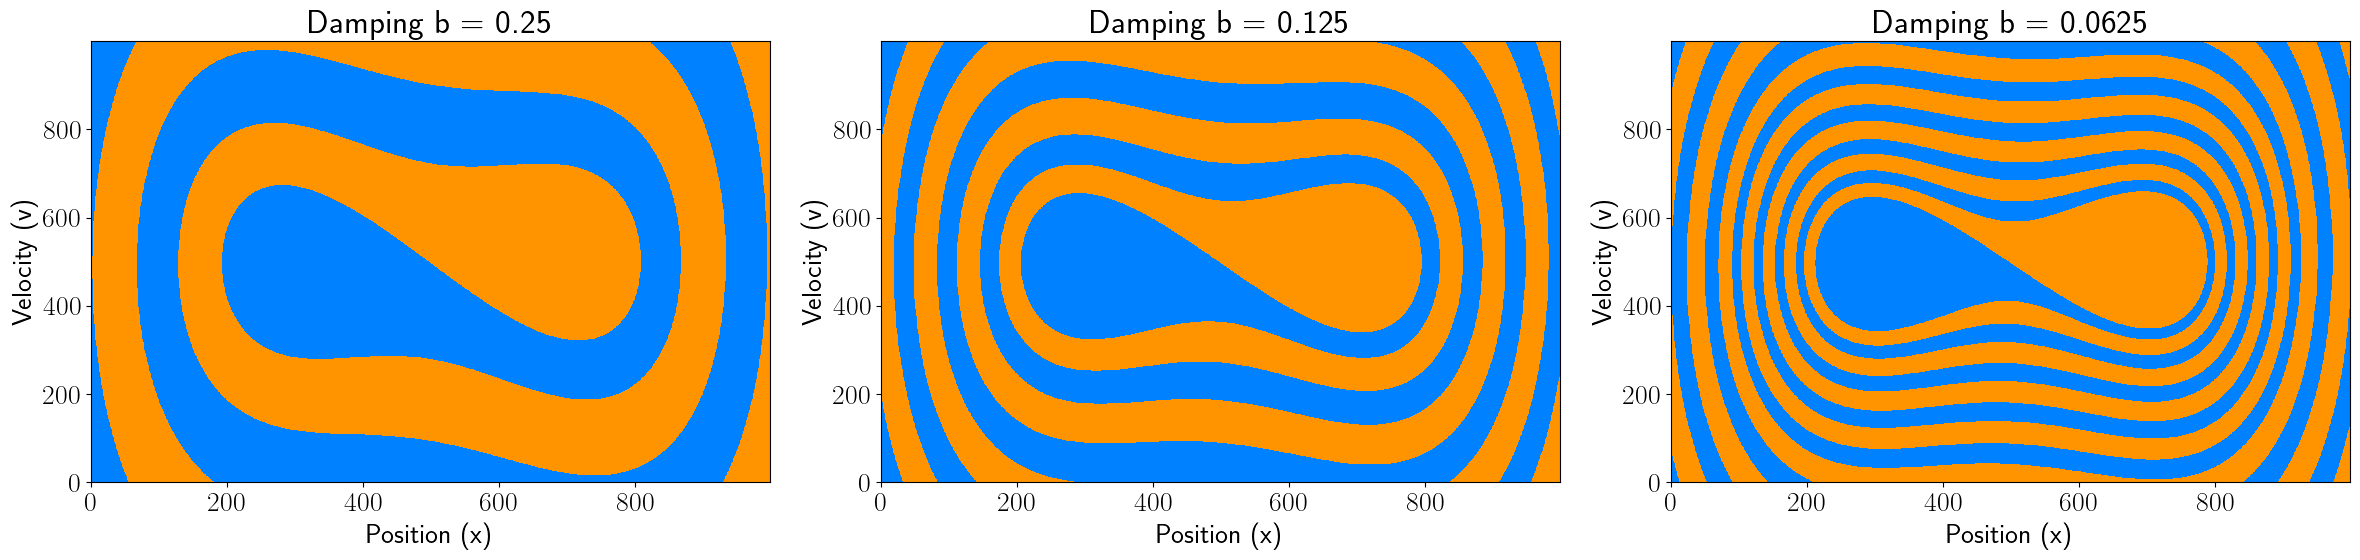

In [2]:
dt = 0.01
w  = 1
F  = 0.0
B  = [0.25, 0.125, 0.0625]
T  = int(5 * 2 * np.pi / dt)                                           # Total time steps
x  = np.linspace(-2.5, 2.5, 1000)
y  = np.linspace(-2.5, 2.5, 1000)

xr, vr = np.meshgrid(x, y)

fig, axes = plt.subplots(1, len(B), figsize=(24, 6))
for i, b in enumerate(B):
    x_temp = xr.copy()
    v_temp = vr.copy()
    for n in range(T):
        a = F * np.cos(w * n * dt) - b * v_temp + x_temp - x_temp**3  # Acceleration
        v_temp = v_temp + a * dt                                      # Velocity update
        x_temp = x_temp + v_temp * dt                                 # Position update

    axes[i].contourf(x_temp > 0, levels=[-2.5, 0, 2.5], cmap='jet')
    axes[i].set_title(f"Damping b = {b}")
    axes[i].set_xlabel("Position (x)")
    axes[i].set_ylabel("Velocity (v)")
plt.tight_layout()
plt.show()

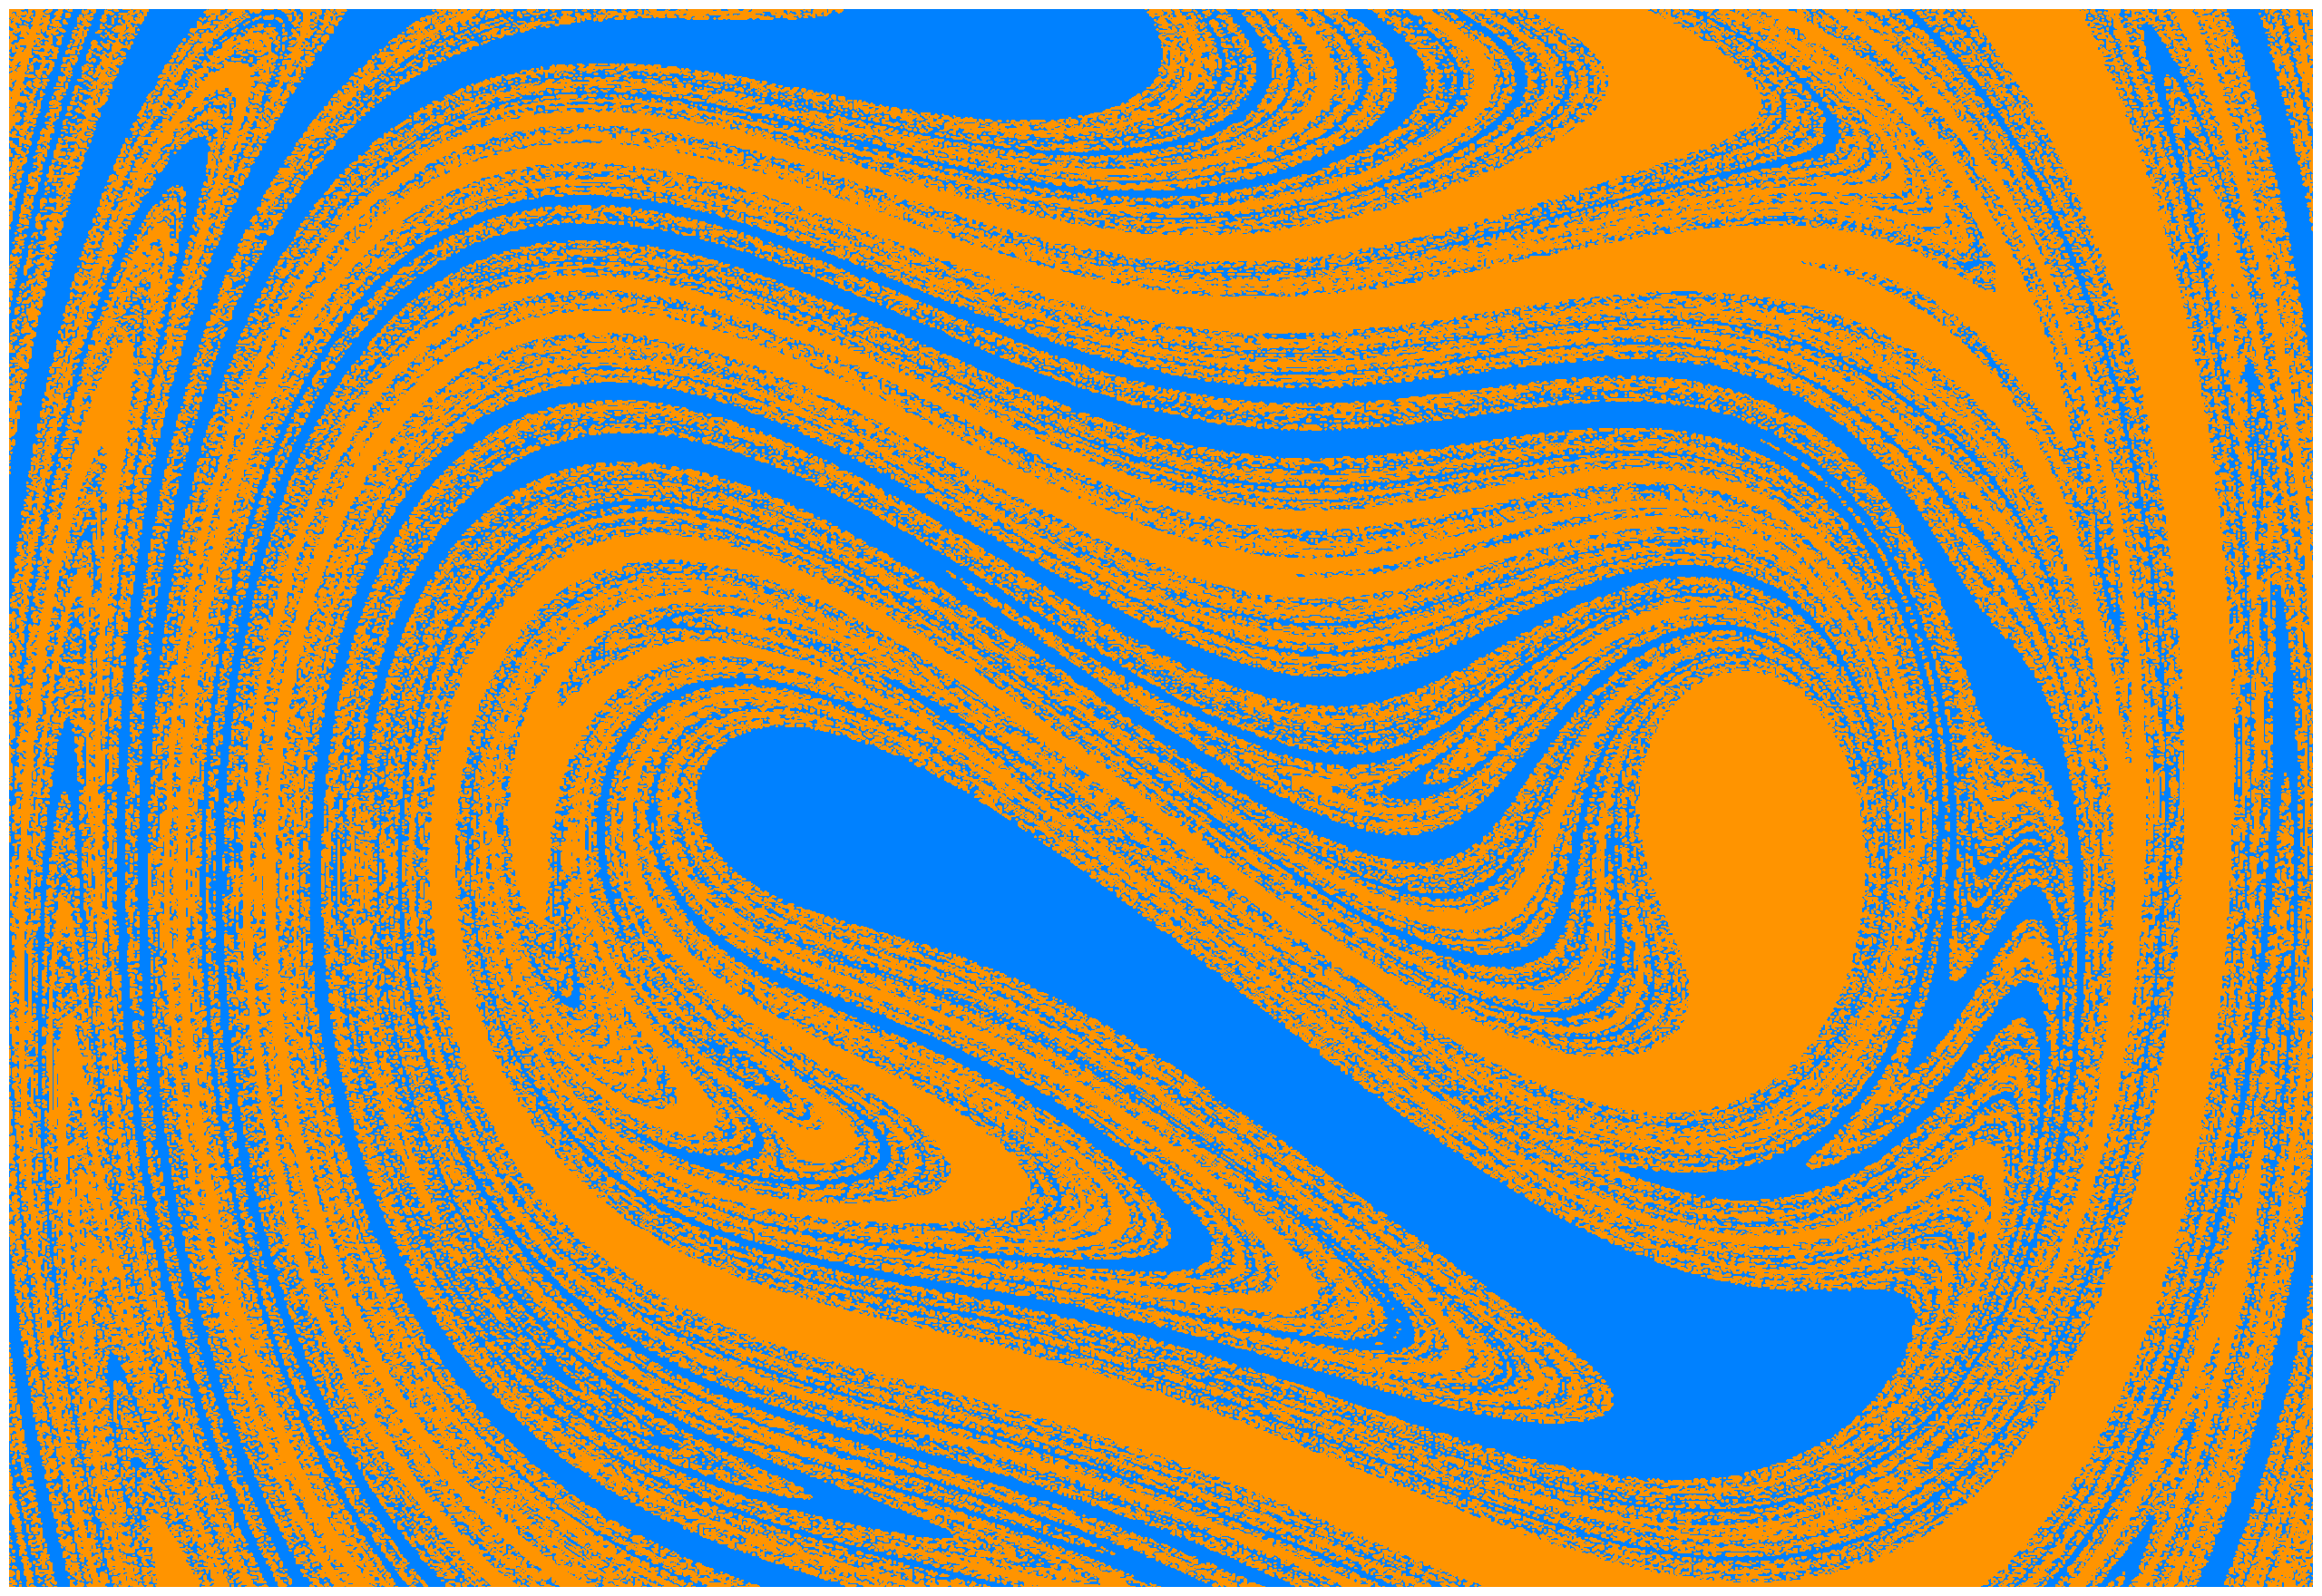

In [3]:
dt = 0.01
w  = 1
F  = 0.25
b  = 0.25
T  = int( 73 * 2*np.pi/dt + 1)
xr = np.linspace(-2.5,2.5,1000)
yr = np.linspace(-2.5,2.5,1000)

x, v = np.meshgrid(xr, yr)

for n in range(T-1):
    a = F*np.cos(w*n*dt) - b*v + x - x**3
    v = v + a*dt
    x = x + v*dt
    if n%10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(26,18))
        plt.contourf(x>0, level=[-2.5,0,2.5], cmap='jet')
        plt.axis(False)
        plt.tight_layout()
        plt.show()

In [4]:
def double_well_oscillator( y, t, delta, omega, F):
    x, v = y
    dxdt = v
    dvdt = - delta * v + x - x**3 + F * np.cos(omega * t)
    return [dxdt, dvdt]

(Basins for the unforced oscillator)                                                                                       
Sketch the basins for the weakly damped double-well oscillator (12.5.1) in the unforced case when $F=0$.                   
How does their shape depend on the size of the damping? What happens to the basins as the damping tends to zero?           
What implications does this have for the predictability of the unforced system?

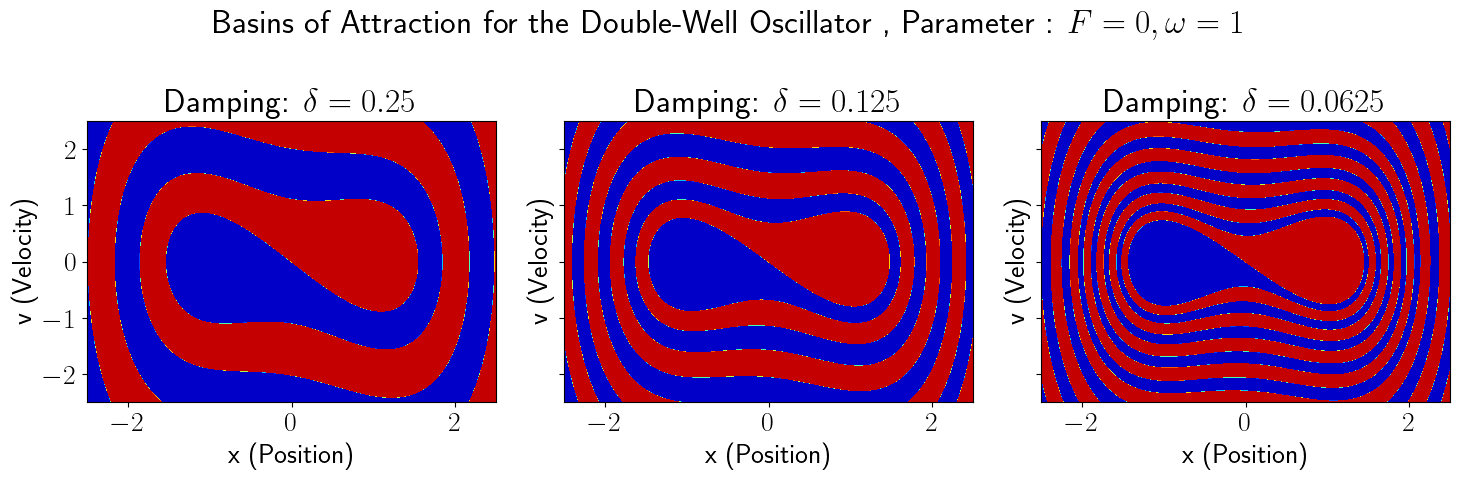

Total execution time: 2 hours, 55 minutes, and 33.5850 seconds


In [5]:
F      = 0
omega  = 1
T      = 2 * np.pi / omega
t = np.linspace(0, 5*T, 1001)        # Time vector
delta_values = [0.25, 0.125, 0.0625]  # Damping values to explore

x_vals = np.linspace(-2.5, 2.5, 900)  # Initial positions
v_vals = np.linspace(-2.5, 2.5, 900)  # Initial velocities
X, V = np.meshgrid( x_vals, v_vals)
initial_conditions = np.column_stack([X.ravel(), V.ravel()])
start_time = time.time()
fig, axs = plt.subplots(1, len(delta_values), figsize=(15, 5), sharex=True, sharey=True)
for idx, delta in enumerate(delta_values):
    basins = np.zeros_like(X)
    for i, y0 in enumerate(initial_conditions):
        sol = odeint(double_well_oscillator, y0, t, args=(delta, omega, F))
        x_final = sol[-1, 0]        # Final x position after integration        
        if x_final < 0:
             basins.ravel()[i] = -1  # Left well
        else:
            basins.ravel()[i] =  1  # Right well  
            
    ax = axs[idx]
    ax.contourf(X, V, basins, level=[-2.5,0,2.5], cmap='jet')
    ax.set_title(f'Damping: $\delta = {delta}$')
    ax.set_xlabel('x (Position)')
    ax.set_ylabel('v (Velocity)')
plt.suptitle(r'Basins of Attraction for the Double-Well Oscillator , Parameter : $F=0,\omega=1$')
plt.tight_layout()
plt.show()

end_time = time.time()

elapsed_time = end_time - start_time                    # Calculate the total elapsed time

# Convert the elapsed time into hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = elapsed_time % 60
print(f"Total execution time: {hours} hours, {minutes} minutes, and {seconds:.4f} seconds")

The basins become thinner as the damping decreases, and they appear to wrap around each other more and more as $\delta\rightarrow 0$ (tends to zero).                                                                                         
This will make for sensitive dependence on initial conditions, which means that accurate prediction of which basin an initial condition will settle into is virtually impossible unless the initial condition is practically settled into one of the basins already.

(Basins for the forced oscillator)                                                                                       
Sketch the basins for the weakly damped double-well oscillator (12.5.1) in the forced case when $F=0.25, \omega=1$.                   

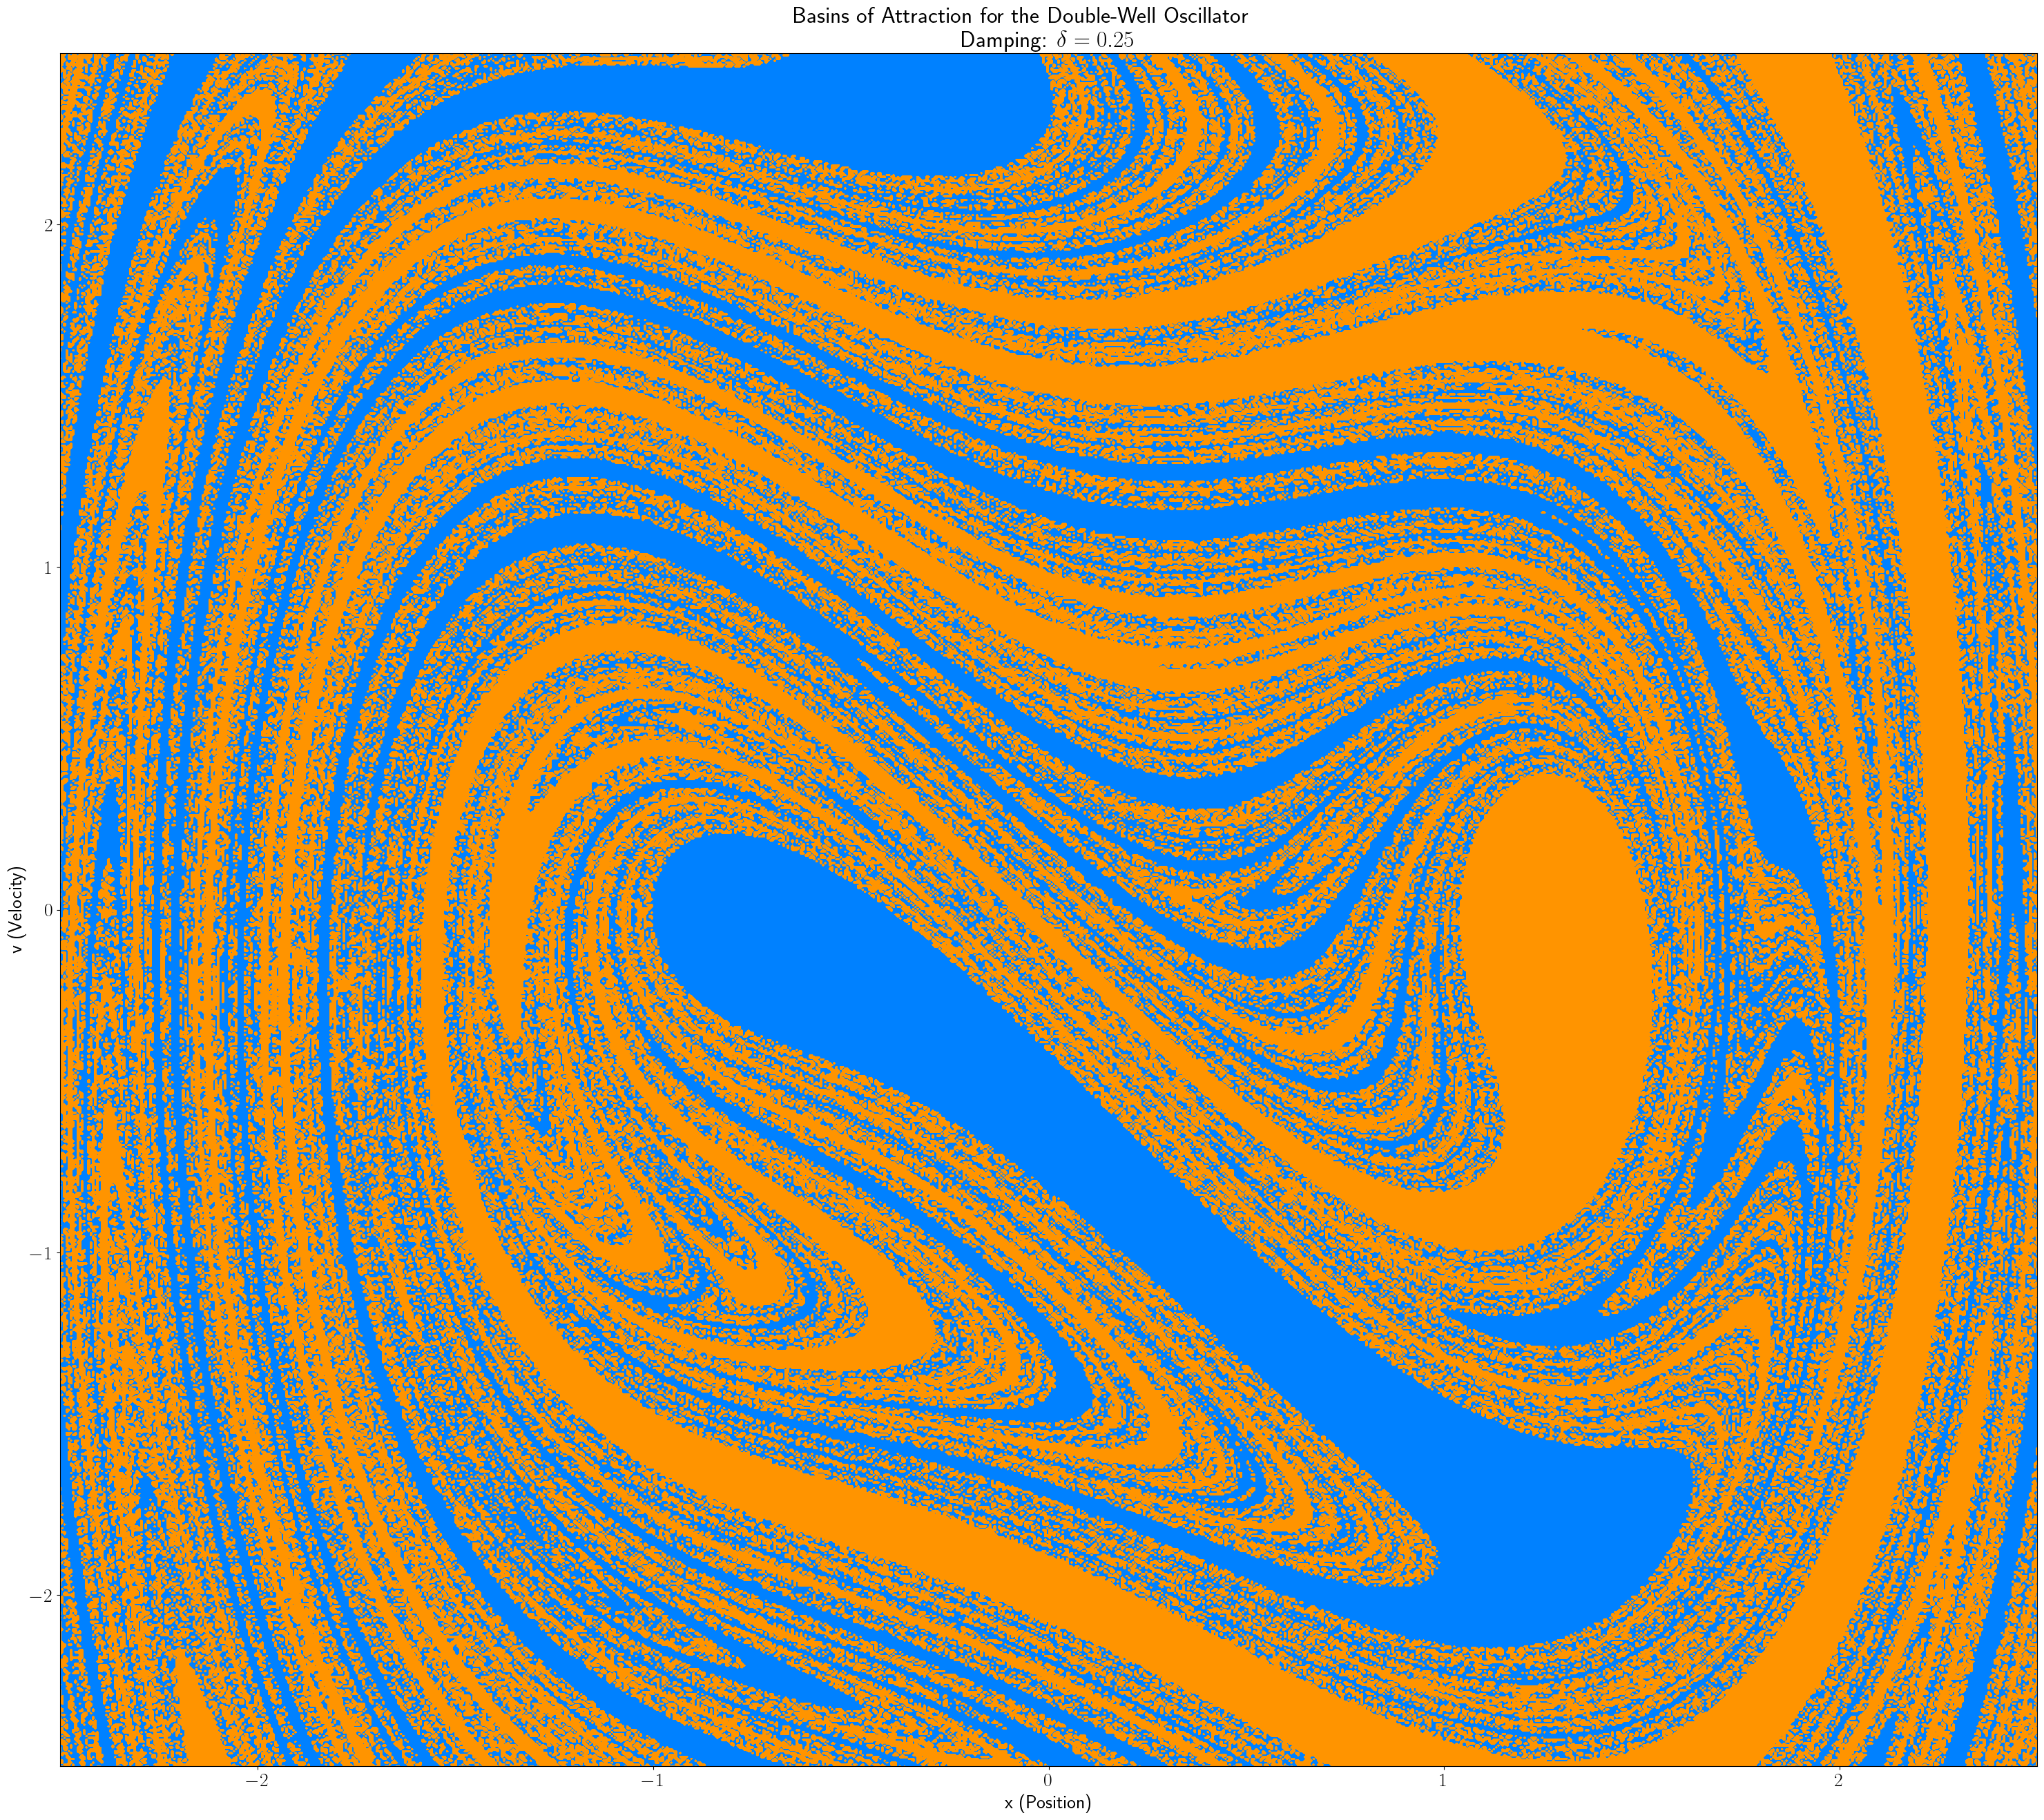

Total execution time: 8 hours, 7 minutes, and 8.0430 seconds


In [6]:
F      = 0.25
delta  = 0.25  
omega  = 1
T      = 2 * np.pi / omega
t      = np.linspace(0, 73*T, 1000)   # Time vector
x_vals = np.linspace(-2.5, 2.5, 900)  # Initial positions
v_vals = np.linspace(-2.5, 2.5, 900)  # Initial velocities
X, V   = np.meshgrid( x_vals, v_vals)
initial_conditions = np.column_stack([X.ravel(), V.ravel()])

fig, ax = plt.subplots( figsize=(30, 27), sharex=True, sharey=True)
start_time = time.time()
basins = np.zeros_like(X)

for i, y0 in enumerate(initial_conditions):
    
    sol = odeint(double_well_oscillator, y0, t, args=(delta, omega, F))
    x_final = sol[-1, 0]        # Final x position after integration        
    if x_final < 0:
        basins.ravel()[i] = -1  # Left well
    else:
        basins.ravel()[i] =  1  # Right well    

ax.contourf(X, V, basins, levels=[-2.5, 0, 2.5], cmap='jet')
ax.set_title(f'Damping: $\delta = {delta}$')
ax.set_xlabel('x (Position)')
ax.set_ylabel('v (Velocity)')
plt.suptitle('Basins of Attraction for the Double-Well Oscillator')
plt.tight_layout()
plt.show()

end_time = time.time()

elapsed_time = end_time - start_time  # Calculate the total elapsed time

# Convert the elapsed time into hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = elapsed_time % 60
print(f"Total execution time: {hours} hours, {minutes} minutes, and {seconds:.4f} seconds")

(Coexisting chaos and limit cycle)                                                                                                            
Consider the double-well oscillator (12.5.1) with parameters $\delta=0.15, F=0.3,$ and $\omega=1$.                      
Show numerically that the system has at least two coexisting attractors : a large limit cycle and a smaller strange attractor. Plot both in a Poincaré section.

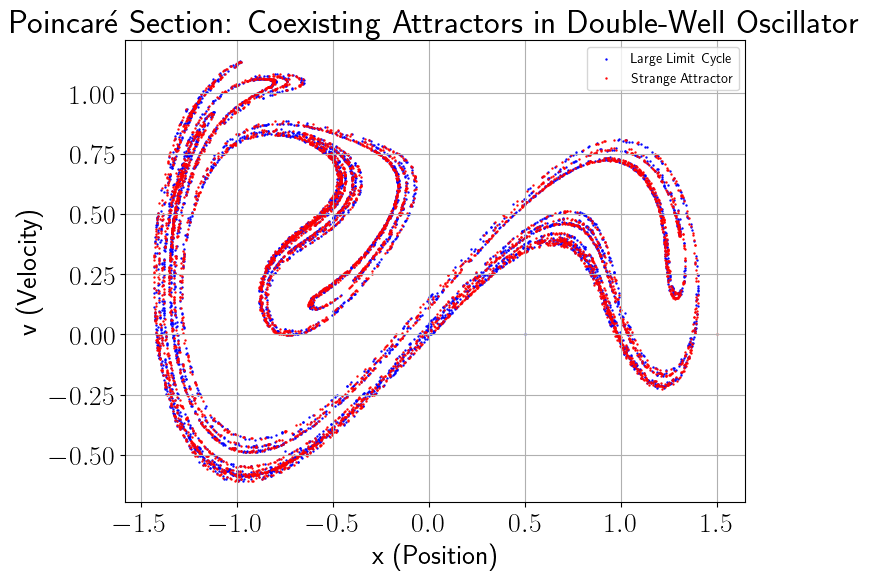

In [7]:
delta = 0.15
F = 0.3
omega = 1.0
T = 2 * np.pi / omega                       # Period of the driving force
t_span = np.linspace(0, 5000 * T, 500000)   # Integrate over 500 periods
poincare_times = np.arange(0, 5000 * T, T)  # Poincaré section times

initial_conditions = [ [0.5, 0],    # Initial condition 1 (expecting large limit cycle)
                       [1.5, 0], ]  # Initial condition 2 (expecting strange attractor)

solutions = [odeint(double_well_oscillator, y0, t_span, args=(delta, omega, F)) for y0 in initial_conditions]

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'red']
labels = ['Large Limit Cycle', 'Strange Attractor']

for i, solution in enumerate(solutions):
    x, v = np.interp(poincare_times, t_span, solution[:, 0]), np.interp(poincare_times, t_span, solution[:, 1])
    ax.scatter(x, v, s=0.5, color=colors[i], label=labels[i])
ax.set_title('Poincaré Section: Coexisting Attractors in Double-Well Oscillator')
ax.set_xlabel('x (Position)')
ax.set_ylabel('v (Velocity)')
ax.legend(fontsize=10)
plt.grid(True)
plt.show()